In [1]:
import os
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [2]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    rotation_range=30, 
    brightness_range=[0.8, 1.2],
    fill_mode='nearest',
    validation_split=0.2  
)

In [3]:
data_directory = r"C:\Users\admin\Desktop\Projects\CS-Project\Tea-Leaf-Comprehensive-Anaysis\Data\nd-images" 

In [4]:
#MORE
train_generator = train_datagen.flow_from_directory(
    data_directory,
    target_size=(224, 224),  
    batch_size=32,
    class_mode='categorical',  
    subset='training'  
)

Found 1003 images belonging to 3 classes.


In [5]:
# Validation Data Generator
validation_generator = train_datagen.flow_from_directory(
    data_directory,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation'  
)

Found 249 images belonging to 3 classes.


In [7]:
base_model.trainable = False

In [8]:
model = tf.keras.Sequential()

In [9]:
model.add(base_model)

In [10]:
from tensorflow.keras import regularizers


model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation = 'relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(3, activation='softmax'))

In [11]:

opt = tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

In [12]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 7, 7, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,926,467 (68.38 MB)

 Trainable params: 3,211,779 (12.25 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [13]:
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('nitrogen_deficiency_classifier.keras', save_best_only=True)

In [14]:
history = model.fit(
    train_generator,
    epochs=30,
    validation_data = validation_generator,
    callbacks= [early_stop, model_checkpoint]
)

Epoch 1/30


c:\Users\admin\Desktop\Projects\CS-Project\Tea-Leaf-Comprehensive-Anaysis\env\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


32/32 ━━━━━━━━━━━━━━━━━━━━ 416s 13s/step - accuracy: 0.4394 - loss: 0.9015 - val_accuracy: 0.5141 - val_loss: 0.8043
Epoch 2/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 499s 16s/step - accuracy: 0.5328 - loss: 0.7618 - val_accuracy: 0.5060 - val_loss: 0.7488
Epoch 3/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 502s 16s/step - accuracy: 0.5498 - loss: 0.7151 - val_accuracy: 0.5462 - val_loss: 0.7132
Epoch 4/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 504s 15s/step - accuracy: 0.6139 - loss: 0.6733 - val_accuracy: 0.5944 - val_loss: 0.6615
Epoch 5/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 532s 17s/step - accuracy: 0.5901 - loss: 0.6579 - val_accuracy: 0.5783 - val_loss: 0.6484
Epoch 6/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 533s 16s/step - accuracy: 0.6243 - loss: 0.6254 - val_accuracy: 0.6466 - val_loss: 0.6311
Epoch 7/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 527s 16s/step - accuracy: 0.6306 - loss: 0.6138 - val_accuracy: 0.6265 - val_loss: 0.6057
Epoch 8/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 514s 16s/step - accuracy: 0.6256 - loss: 0.6090 - val_accuracy: 0.5863 - val_

In [15]:
val_loss, val_accuracy = model.evaluate(validation_generator)
print(f"Validation Accuracy: {val_accuracy*100:.2f}%")

8/8 ━━━━━━━━━━━━━━━━━━━━ 81s 10s/step - accuracy: 0.7391 - loss: 0.5046
Validation Accuracy: 71.08%


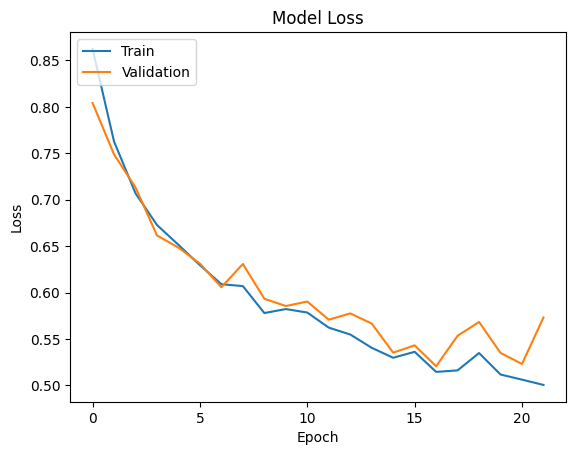

In [16]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [17]:
model.save('nitrogen_deficiency_classifier.keras')

In [18]:
def predict_deficiency(img_path):
    img = tf.keras.preprocessing.image.load_img(img_path, target_size=(224, 224))
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.  

    prediction = model.predict(img_array)
    categories = ['Healthy', 'Early', 'Advanced']

    predicted_class = np.argmax(prediction[0])
    
    print(f"Predicted Category: {categories[predicted_class]}")


predict_deficiency('Test3.jpg')  

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Predicted Category: Early
